In [2]:
import pandas as pd
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import geopandas as gpd
from matplotlib.lines import Line2D
from shapely.geometry import LineString

In [3]:
nodes_path = "/Users/tristan.lemoalle/Documents/Thèse/Code/code_these/config/nodes_big_grid_graph_num.csv"
edges_path = "/Users/tristan.lemoalle/Documents/Thèse/Code/code_these/config/edges_big_grid_graph_num.csv"

In [4]:
def get_edge_style(row):
    # couleur selon le type de piste cyclable
    if pd.isna(row["type_bike"]) or row["type_bike"] in ["None", ""]:
        color = "#000000"  # noir
    elif row["type_bike"] == "bike_path":
        color = "#ff69b4"  # rose
    elif row["type_bike"] == "bike_lane":
        color = "#8000ff"  # violet
    else:
        color = "#555555"  # par défaut

    # style selon le type de route
    if row["type_car"] == "primary":
        width = 4
        dash = "solid"
    elif row["type_car"] == "secondary":
        width = 2
        dash = "solid"
    elif row["type_car"] == "tertiary":
        width = 2
        dash = "dot"
    else:
        width = 1
        dash = "solid"

    return color, width, dash

# --- Fonction pour les nœuds colorés ---
def node_trace(color, size, condition):
    df = nodes[nodes["type"] == condition]
    return go.Scatter3d(
        x=df["x"], y=df["y"], z=df["z"],
        mode='markers+text',
        text=df["node"],
        hovertext=df["node"],
        hoverinfo="text",
        marker=dict(size=size, color=color, opacity=0.9),
        name=condition,
        textposition="top center",
        textfont=dict(size=10, color=color)
    )

In [5]:
nodes = pd.read_csv(nodes_path, dtype={"node": int})
edges = pd.read_csv(edges_path, dtype={"node1": int, "node2": int})

G = nx.Graph()

for _, row in nodes.iterrows():
    G.add_node(int(row["node"]), x=int(row["x"]), y=int(row["y"]), z=int(row["z"]), type=row["type"])

for _, row in edges.iterrows():
    G.add_edge(
        int(row["node1"]),
        int(row["node2"]),
        type_car=row["type_car"],
        type_bike=row["type_bike"],
        speed=int(row["speed"]),
        lanes=int(row["lanes"])
    )

In [6]:
def get_edge_style(row):
    # couleur selon le type de piste cyclable
    if pd.isna(row["type_bike"]) or row["type_bike"] in ["None", ""]:
        color = "#000000"  # noir
    elif row["type_bike"] == "bike_path":
        color = "#ff69b4"  # rose
    elif row["type_bike"] == "bike_lane":
        color = "#8000ff"  # violet
    else:
        color = "#555555"  # par défaut

    # style selon le type de route
    if row["type_car"] == "primary":
        width = 4
        dash = "solid"
    elif row["type_car"] == "secondary":
        width = 2
        dash = "solid"
    elif row["type_car"] == "tertiary":
        width = 2
        dash = "dot"
    else:
        width = 1
        dash = "solid"

    return color, width, dash

# --- Créer une trace par type de style ---
edge_traces = []

for _, row in edges.iterrows():
    u, v = row["node1"], row["node2"]
    print(u)
    print(v)
    x0, y0, z0 = G.nodes[u]["x"], G.nodes[u]["y"], G.nodes[u]["z"]
    x1, y1, z1 = G.nodes[v]["x"], G.nodes[v]["y"], G.nodes[v]["z"]

    color, width, dash = get_edge_style(row)
    edge_traces.append(
        go.Scatter3d(
            x=[x0, x1],
            y=[y0, y1],
            z=[z0, z1],
            mode="lines",
            line=dict(color=color, width=width, dash=dash),
            hoverinfo="none",
            showlegend=False
        )
    )



# --- Nœuds par type ---
ext_nodes = node_trace("orange", 8, "ext")
act_nodes = node_trace("red", 8, "act")
dom_nodes = node_trace("yellow", 8, "dom")

# --- Nœuds "autres" ---
other_nodes = nodes[~nodes["type"].isin(["ext", "act", "dom"])]
other_trace = go.Scatter3d(
    x=other_nodes["x"], y=other_nodes["y"], z=other_nodes["z"],
    mode='markers+text',
    text=other_nodes["node"],
    hovertext=other_nodes["node"],
    hoverinfo="text",
    marker=dict(size=4, color="black", opacity=0.7),
    name="autres",
    textposition="top center",
    textfont=dict(size=8, color="black")
)

# --- Combiner les traces ---
fig = go.Figure(data=edge_traces + [ext_nodes, act_nodes, dom_nodes, other_trace])

fig.update_layout(
    title="Graphe 3D avec styles d’arêtes selon type_car et type_bike",
    showlegend=True,
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False)
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    width=1000,
    height=1000

)

11
41
41
31
41
91
91
161
91
101
91
81
101
111
101
161
81
141
141
151
171
161
151
161
111
171
111
51
51
21
21
61
61
181
181
171
181
251
251
241
241
171
241
231
231
161
231
221
221
151
221
211
211
141
211
201
201
131
131
141
131
121
121
71
121
191
191
201
191
12
251
261
12
22
22
32
32
201
42
211
32
42
42
52
52
221
52
62
62
231
62
72
72
241
72
82
82
251
261
92
82
92
22
102
102
112
112
32
112
122
122
42
122
132
132
62
132
142
142
72
142
152
152
82
152
162
162
92
172
112
182
132


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#000000', 'dash': 'solid', 'width': 4},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [5, 5],
              'y': [13, 12],
              'z': [1, 1]},
             {'hoverinfo': 'none',
              'line': {'color': '#000000', 'dash': 'solid', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [5, 3],
              'y': [12, 12],
              'z': [1, 1]},
             {'hoverinfo': 'none',
              'line': {'color': '#000000', 'dash': 'solid', 'width': 4},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [5, 5],
              'y': [12, 10],
              'z': [1, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#ff69b4', 'dash': 'solid', 'width': 4},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [5, 6],
              'y': [10, 8],
              'z': [0, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#000000', 'dash': 'dot', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [5, 6],
              'y': [10, 10],
              'z': [0, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#000000', 'dash': 'dot', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [5, 4],
              'y': [10, 10],
              'z': [0, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#000000', 'dash': 'dot', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [6, 7],
              'y': [10, 10],
              'z': [0, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#000000', 'dash': 'dot', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [6, 6],
              'y': [10, 8],
              'z': [0, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#000000', 'dash': 'dot', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [4, 4],
              'y': [10, 8],
              'z': [0, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#8000ff', 'dash': 'dot', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [4, 5],
              'y': [8, 8],
              'z': [0, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#8000ff', 'dash': 'solid', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [7, 6],
              'y': [8, 8],
              'z': [0, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#000000', 'dash': 'dot', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [5, 6],
              'y': [8, 8],
              'z': [0, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#8000ff', 'dash': 'solid', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d',
              'x': [7, 7],
              'y': [10, 8],
              'z': [0, 0]},
             {'hoverinfo': 'none',
              'line': {'color': '#8000ff', 'dash': 'solid', 'width': 2},
              'mode': 'lines',
              'showlegend': False,
              'type': 'scatter3d

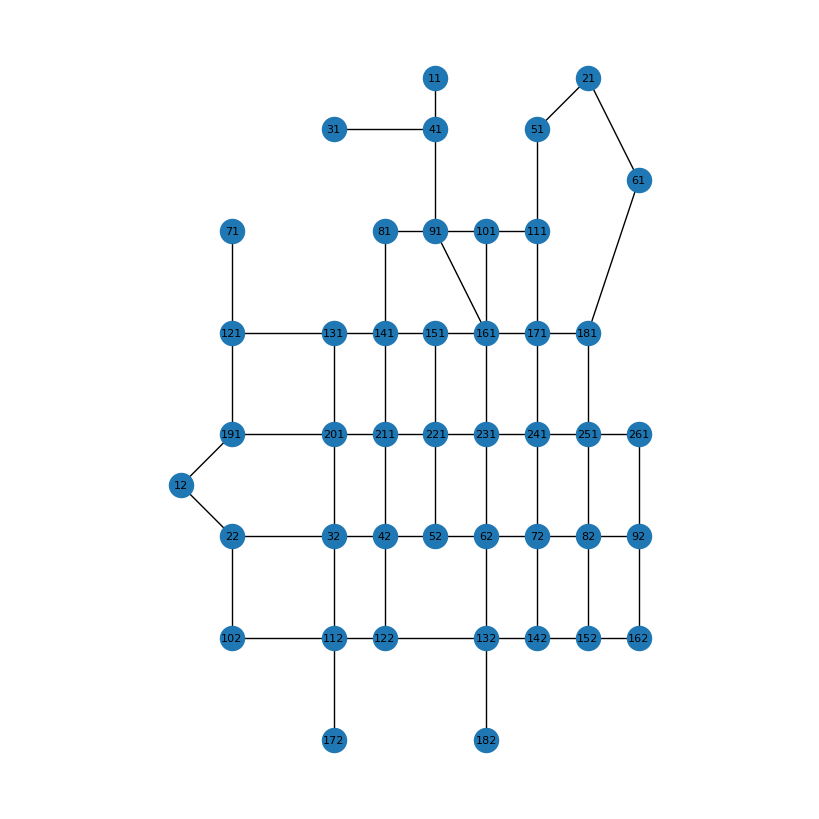

In [7]:
# NetworkX doesn't have a `plot` function. Use `draw` with matplotlib instead.
pos = {n: (d["x"], d["y"]) for n, d in G.nodes(data=True)}
plt.figure(figsize=(8, 8))
nx.draw(G, pos=pos, with_labels=True, node_size=300, font_size=8)
plt.axis("equal")
plt.show()

In [8]:
# Ajout de l'attribut "lenght" (distance euclidienne 2D) aux arêtes

# Préparer les coordonnées des nœuds
_node_xy = nodes.set_index("node")[["x", "y"]]

# Calcul vectorisé des longueurs
edges["length"] = np.sqrt(
    (_node_xy.loc[edges["node1"], "x"].values - _node_xy.loc[edges["node2"], "x"].values) ** 2 +
    (_node_xy.loc[edges["node1"], "y"].values - _node_xy.loc[edges["node2"], "y"].values) ** 2
)

# Injection dans le graphe NetworkX
for _, r in edges.iterrows():
    G[r.node1][r.node2]["length"] = r["length"]

In [9]:
for edge in G.edges(data=True):
    if edge[2].get("type_bike") in ['bike_lane','bike_path']:
        edge[2]["bikes"] = True
    else:
        edge[2]["bikes"] = False

In [10]:
# Export du graphe G en fichier GraphML
nx.write_graphml(G, "/Users/tristan.lemoalle/Documents/Thèse/Code/code_these/config/big_city_graph.graphml")

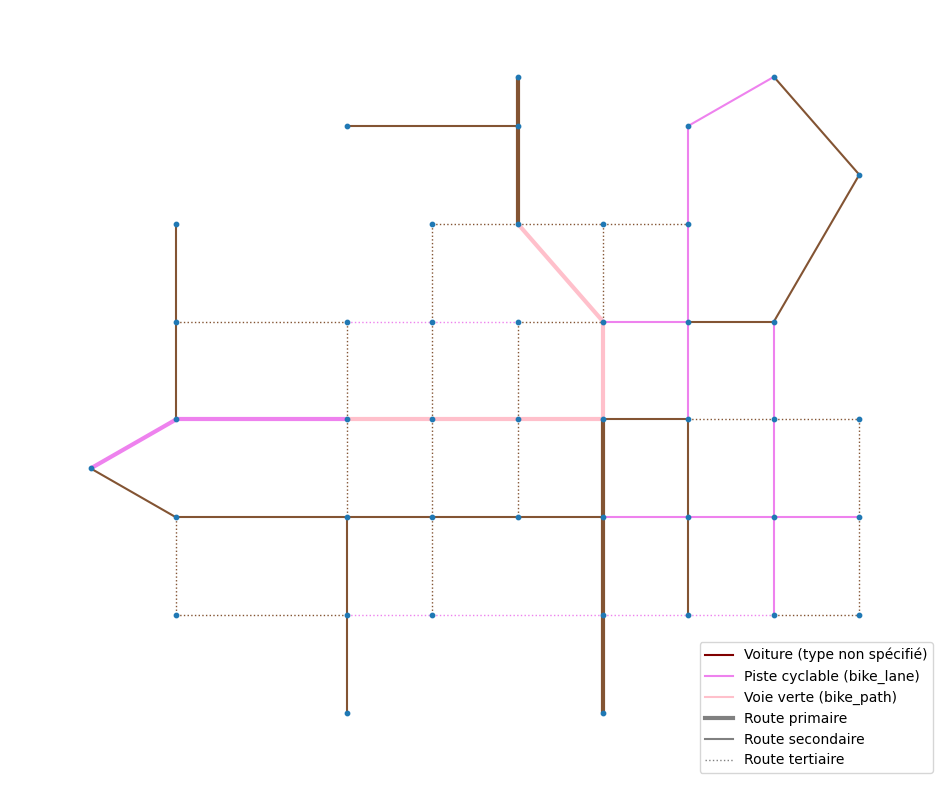

In [11]:
pos_big_city = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

edge_colors = []
edge_linewidths = []
edge_linestyles = []

# Définition des styles
color_map = {'bike_lane': 'violet', 'bike_path': 'pink'}
linewidth_map = {'primary': 3, 'secondary': 1.5, 'tertiary': 1}
linestyle_map = {'primary': 'solid', 'secondary': 'solid', 'tertiary': 'dotted'}

# Valeurs par défaut si un attribut est manquant
default_color = "#835433"
default_linewidth = 0.5
default_linestyle = 'solid'

for _, _, edge in G.edges(data=True):
    # Détermination de la couleur en fonction de 'type_bike'
    bike_type = edge.get('type_bike')
    edge_colors.append(color_map.get(bike_type, default_color))

    # Détermination de l'épaisseur et du style en fonction de 'type_car'
    car_type = edge.get('type_car')
    edge_linewidths.append(linewidth_map.get(car_type, default_linewidth))
    edge_linestyles.append(linestyle_map.get(car_type, default_linestyle))

fig, ax = plt.subplots(figsize=(12, 10))
# Affichage du graphe avec les styles personnalisés
nx.draw(
    G, pos_big_city,
    edge_color=edge_colors,
    width=edge_linewidths,
    style=edge_linestyles,
    node_size=10, ax=ax
)


legend_elements = [
    Line2D([0], [0], color='maroon', lw=1.5, label='Voiture (type non spécifié)'),
    Line2D([0], [0], color='violet', lw=1.5, label='Piste cyclable (bike_lane)'),
    Line2D([0], [0], color='pink', lw=1.5, label='Voie verte (bike_path)'),
    Line2D([0], [0], color='gray', lw=3, linestyle='solid', label='Route primaire'),
    Line2D([0], [0], color='gray', lw=1.5, linestyle='solid', label='Route secondaire'),
    Line2D([0], [0], color='gray', lw=1, linestyle='dotted', label='Route tertiaire')
]
ax.legend(handles=legend_elements, loc='lower right')

plt.show()

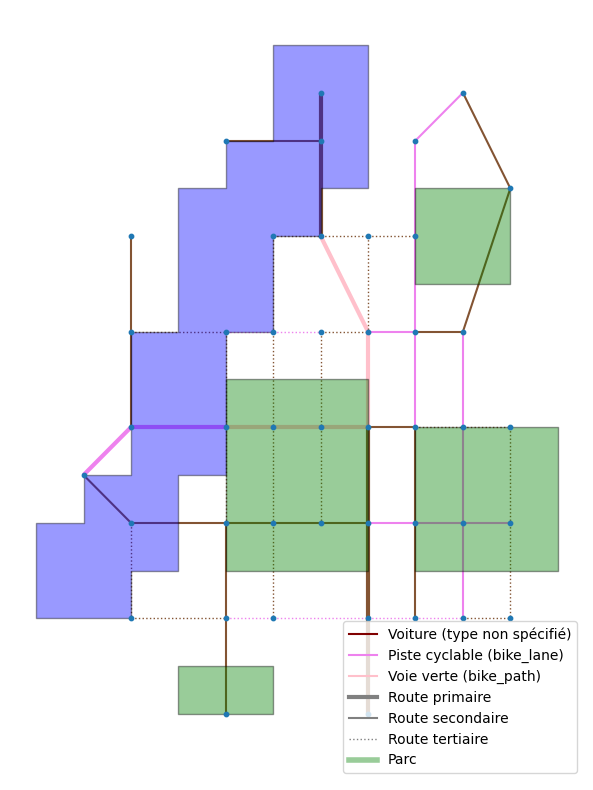

In [12]:
# Charger le fichier GeoJSON
parcs = gpd.read_file("/Users/tristan.lemoalle/Documents/Thèse/Code/code_these/config/parc_big_city.geojson")

# Recréer la figure pour y ajouter les parcs
fig, ax = plt.subplots(figsize=(12, 10))

# Redessiner le graphe
nx.draw(
    G, pos_big_city,
    edge_color=edge_colors,
    width=edge_linewidths,
    style=edge_linestyles,
    node_size=10, ax=ax
)

# Dessiner les polygones des parcs sur le même axe
parcs.plot(ax=ax, color=parcs['color'], alpha=0.4, edgecolor='black')

# Ajouter la légende (y compris pour les parcs)
legend_elements_with_parcs = legend_elements + [
    Line2D([0], [0], color="green", lw=4, alpha=0.4, label='Parc')
]
ax.legend(handles=legend_elements_with_parcs, loc='lower right')

plt.show()

In [13]:
# Fonction: calculer la couverture vert/bleu autour des arêtes
# Ajoute l'attribut `green_blue_coverage` (0-100) à chaque arête du graphe G.
# Principe:
#  - construire une GeoDataFrame d'arêtes (LineString) à partir des coordonnées des nœuds de G
#  - projeter en CRS métrique (EPSG:3857) pour pouvoir buffer en mètres
#  - buffer de `buffer_m` mètres autour de chaque arête
#  - calculer l'aire d'intersection entre ce buffer et `parcs_gdf`
#  - normaliser en pourcentage [0,100] et l'ajouter aux attributs d'arête

def add_green_blue_coverage(G, parcs_gdf, buffer_m=0.1, target_crs='EPSG:3857'):
    """Calcule et attache `green_blue_coverage` (float 0-100) aux arêtes de G.

    Paramètres
    ----------
    G : networkx.Graph
        Graphe contenant des nœuds avec attributs 'x' et 'y' (coordonnées).
    parcs_gdf : geopandas.GeoDataFrame
        GeoDataFrame contenant les espaces verts (polygones). Si sa CRS est None,
        on tentera d'en déduire une CRS compatible depuis les coordonnées des nœuds.
    buffer_m : float
        Rayon de buffer autour des arêtes en mètres (défaut 10 m).
    target_crs : str
        CRS projetée en mètres pour le calcul (défaut 'EPSG:3857').

    Retour
    ------
    edges_cov : geopandas.GeoDataFrame
        GeoDataFrame contenant colonnes 'u','v' et 'green_blue_coverage' (valeur 0-100).
    """
    # Récupérer coordonnées des nœuds
    nodes_xy = {n: (d.get('x'), d.get('y')) for n, d in G.nodes(data=True)}

    # Construire liste d'arêtes géométriques
    rows = []
    for u, v, data in G.edges(data=True):
        xy_u = nodes_xy.get(u)
        xy_v = nodes_xy.get(v)
        x0, y0 = xy_u
        x1, y1 = xy_v
        # si une coord est nan, skip
        
        geom = LineString([(float(x0), float(y0)), (float(x1), float(y1))])
        rows.append({'u': u, 'v': v, 'geometry': geom})

    edges_gdf = gpd.GeoDataFrame(rows, geometry='geometry')

    # Détecter si les coordonnées semblent être en degrés (lon/lat) ou déjà projetées
    xs = [pt[0] for pt in nodes_xy.values() if pt[0] is not None]
    ys = [pt[1] for pt in nodes_xy.values() if pt[1] is not None]
    if len(xs) == 0 or len(ys) == 0:
        raise ValueError('Coordonnées des nœuds indisponibles.')

    if max(np.abs(xs)) <= 180 and max(np.abs(ys)) <= 90:
        nodes_crs = 'EPSG:4326'  # lon/lat probable
    else:
        nodes_crs = 'EPSG:3857'  # déjà en mètres probable

    # Assigner CRS aux arêtes
    edges_gdf.set_crs(nodes_crs, inplace=True)

    # Préparer parcs: si pas de CRS, on suppose la même que nodes_crs
    parcs = parcs_gdf.copy()
    if parcs.crs is None:
        parcs.set_crs(nodes_crs, inplace=True)

    # Projecter vers un CRS métrique pour buffer/mètres
    edges_proj = edges_gdf.to_crs(target_crs)
    parcs_proj = parcs.to_crs(target_crs)

    # Construire le buffer et calculer aires
    edges_proj['buffer'] = edges_proj.geometry.buffer(buffer_m)
    edges_proj['buffer_area'] = edges_proj['buffer'].area

    # Calculer intersection et coverage
    coverages = []
    # accélération: unionner parcs pour une intersection plus rapide si grand nombre
    try:
        parcs_union = parcs_proj.unary_union
    except Exception:
        parcs_union = None

    for idx, row in edges_proj.iterrows():
        buf = row['buffer']
        if parcs_union is not None:
            inter = buf.intersection(parcs_union)
            inter_area = getattr(inter, 'area', 0.0)
        else:
            # fallback: intersect avec chaque parc (plus lent)
            inter_area = 0.0
            for geom in parcs_proj.geometry:
                inter_area += buf.intersection(geom).area

        buf_area = row['buffer_area'] if row['buffer_area'] > 0 else buf.area
        if buf_area > 0:
            pct = float((inter_area / buf_area) * 100.0)
        else:
            pct = 0.0
        # clamp
        pct = max(0.0, min(100.0, pct))
        coverages.append(pct)

    edges_proj['green_blue_coverage'] = coverages

    # Injecter l'attribut dans le graphe G
    for _, r in edges_proj.iterrows():
        u = r['u']; v = r['v']; val = float(r['green_blue_coverage'])
        if G.has_edge(u, v):
            G[u][v]['green_blue_coverage'] = val
        elif G.has_edge(v, u):
            G[v][u]['green_blue_coverage'] = val

    # Retourner un petit GeoDataFrame récapitulatif
    return edges_proj[['u', 'v', 'green_blue_coverage']]


In [14]:
# Exemple d'utilisation de `add_green_blue_coverage`
# Cette cellule suppose que `G` (networkx.Graph) et `parcs` (GeoDataFrame) existent déjà
# et proviennent des cellules précédentes du notebook.

try:
    # si la variable parcs n'existe pas, la charger depuis le fichier connu
    if 'parcs' not in globals():
        parcs = gpd.read_file("/Users/tristan.lemoalle/Documents/Thèse/Code/code_these/config/parc_big_city.geojson")

    # Calculer la couverture (buffer 10 m par défaut)
    summary = add_green_blue_coverage(G, parcs, buffer_m=10)

    # Afficher un aperçu
    print('Extrait des valeurs green_blue_coverage (u, v, coverage):')
    display(summary.head(10))

    # Exemple: compter arêtes avec >50% coverage
    above_50 = summary[summary['green_blue_coverage'] > 50.0]
    print(f"Arêtes avec >50% de couverture vert/bleu : {len(above_50)} / {len(summary)}")

except Exception as e:
    print('Erreur lors du calcul ou de l affichage :', e)


Extrait des valeurs green_blue_coverage (u, v, coverage):


/var/folders/c_/mcr05gr92pd6ztptt0kc_dgdj_jl00/T/ipykernel_9916/4168451419.py:78: DeprecationWarning:

The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.



,u,v,green_blue_coverage
0,11,41,100.000000
1,21,51,0.000000
2,21,61,0.001582
3,31,41,74.998239
4,41,91,75.040679
5,51,111,24.957592
6,61,181,66.756955
7,71,121,0.001739
8,81,91,50.000000
9,81,141,50.000000


Arêtes avec >50% de couverture vert/bleu : 29 / 66


Arêtes: 66, total buffer area (m^2): 23.4


/var/folders/c_/mcr05gr92pd6ztptt0kc_dgdj_jl00/T/ipykernel_9916/2413705333.py:71: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



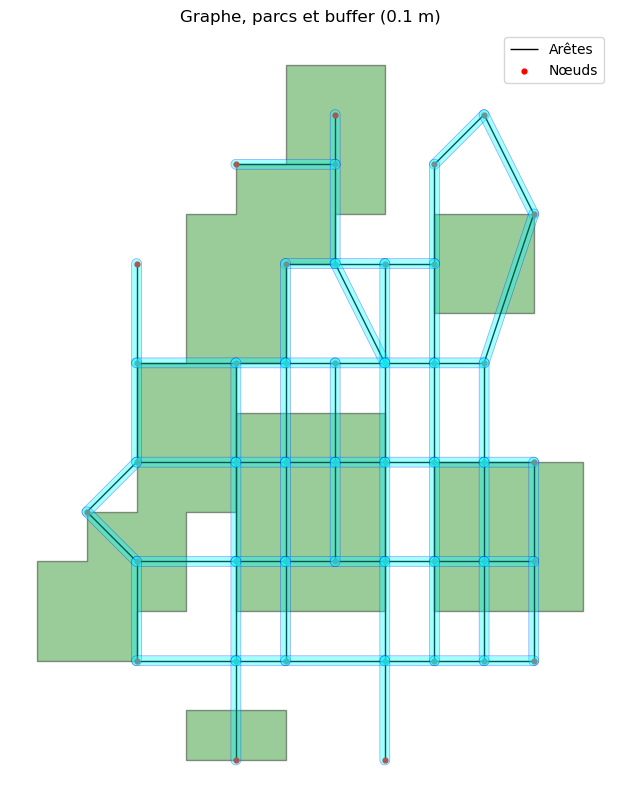

In [15]:
# Afficher le graphe, les parcs et le buffer autour des arêtes (10 m)
# Cette cellule projette les géométries en CRS métrique, crée un buffer de `buffer_m` mètres
# autour des arêtes et affiche : parcs (verts), buffers (cyan), arêtes (gris) et nœuds (rouge).

buffer_m = 0.1


try:
    # Charger/valider les parcs si nécessaire
    if 'parcs' not in globals():
        parcs = gpd.read_file("/Users/tristan.lemoalle/Documents/Thèse/Code/code_these/config/parc_big_city.geojson")

    # Construire une GeoDataFrame d'arêtes à partir du graphe G
    nodes_xy = {n: (d.get('x'), d.get('y')) for n, d in G.nodes(data=True)}
    rows = []
    for u, v, data in G.edges(data=True):
        xy_u = nodes_xy.get(u)
        xy_v = nodes_xy.get(v)
        if xy_u is None or xy_v is None:
            continue
        x0, y0 = xy_u
        x1, y1 = xy_v
        if x0 is None or y0 is None or x1 is None or y1 is None:
            continue
        try:
            geom = LineString([(float(x0), float(y0)), (float(x1), float(y1))])
        except Exception:
            continue
        rows.append({'u': u, 'v': v, 'geometry': geom})

    edges_gdf = gpd.GeoDataFrame(rows, geometry='geometry')
    edges_proj = edges_gdf

    # Buffer autour des arêtes
    edges_proj['buffer'] = edges_proj.geometry.buffer(buffer_m)

    # Diagnostics rapides
    n_buffers = len(edges_proj)
    total_buffer_area = edges_proj['buffer'].area.sum()
    print(f"Arêtes: {len(edges_proj)}, total buffer area (m^2): {total_buffer_area:.1f}")

    # Préparer GeoDataFrames dédiés pour tracer proprement sans changer la geometry active
    buffers_gdf = edges_proj.copy()
    buffers_gdf = buffers_gdf.set_geometry('buffer')

    edges_geom_gdf = edges_proj.copy()
    edges_geom_gdf = edges_geom_gdf.set_geometry('geometry')

    # Préparer les nœuds pour affichage
    nodes_df = pd.DataFrame([{'node': n, 'x': d.get('x'), 'y': d.get('y')} for n, d in G.nodes(data=True)])
    nodes_gdf = gpd.GeoDataFrame(nodes_df, geometry=gpd.points_from_xy(nodes_df.x, nodes_df.y))
    nodes_proj = nodes_gdf

    # Plot
    fig, ax = plt.subplots(figsize=(12, 10))

    # Parcs — derrière (zorder=1)
    parcs.plot(ax=ax, color='green', alpha=0.4, edgecolor='black', label='Parcs', zorder=1)

    # Buffers — dessiner la face avec transparence et une bordure visible (zorder=2)
    buffers_gdf.plot(ax=ax, facecolor='cyan', edgecolor='blue', alpha=0.35, linewidth=0.5, label=f'Buffer {buffer_m} m', zorder=5)

    # Arêtes — au-dessus (zorder=3)
    edges_geom_gdf.plot(ax=ax, color='black', linewidth=1, label='Arêtes', zorder=3)

    # Nœuds — au-dessus (zorder=4)
    nodes_proj.plot(ax=ax, color='red', markersize=12, label='Nœuds', zorder=4)

    ax.set_title(f'Graphe, parcs et buffer ({buffer_m} m)')
    ax.set_axis_off()
    ax.legend()
    plt.show()

except Exception as e:
    print('Erreur lors du tracé :', e)


In [16]:
def slope(coordA, coordB):
    xa = coordA[0]
    ya = coordA[1]
    za = coordA[2]
    xb = coordB[0]
    yb = coordB[1]
    zb = coordB[2]
    return (zb-za)/np.sqrt((xb-xa)**2+(yb-ya)**2)

# Boucle pour récupérer les coordonnées de chaque paire de nœuds pour chaque arête
edge_coordinates = []
for u, v in G.edges():
    # Récupérer les coordonnées du premier nœud (u)
    coords_u = (G.nodes[u]['x'], G.nodes[u]['y'], G.nodes[u]['z'])
    
    # Récupérer les coordonnées du deuxième nœud (v)
    coords_v = (G.nodes[v]['x'], G.nodes[v]['y'], G.nodes[v]['z'])
    
    # Ajouter les informations à la liste
    edge_coordinates.append({
        'edge': (u, v),
        'node1_coords': coords_u,
        'node2_coords': coords_v,
        'slope': slope(coords_u, coords_v)
    })

# Afficher les 5 premiers résultats pour l'exemple
for item in edge_coordinates:
    print(item)
    u = item['edge'][0]; v = item['edge'][1]; slp = float(item['slope'])
    if G.has_edge(u, v):
        G[u][v]['slope'] = slp
    elif G.has_edge(v, u):
        G[v][u]['slope'] = slp



{'edge': (11, 41), 'node1_coords': (5, 13, 1), 'node2_coords': (5, 12, 1), 'slope': np.float64(0.0)}
{'edge': (21, 51), 'node1_coords': (8, 13, 0), 'node2_coords': (7, 12, 0), 'slope': np.float64(0.0)}
{'edge': (21, 61), 'node1_coords': (8, 13, 0), 'node2_coords': (9, 11, 1), 'slope': np.float64(0.4472135954999579)}
{'edge': (31, 41), 'node1_coords': (3, 12, 1), 'node2_coords': (5, 12, 1), 'slope': np.float64(0.0)}
{'edge': (41, 91), 'node1_coords': (5, 12, 1), 'node2_coords': (5, 10, 0), 'slope': np.float64(-0.5)}
{'edge': (51, 111), 'node1_coords': (7, 12, 0), 'node2_coords': (7, 10, 0), 'slope': np.float64(0.0)}
{'edge': (61, 181), 'node1_coords': (9, 11, 1), 'node2_coords': (8, 8, 1), 'slope': np.float64(0.0)}
{'edge': (71, 121), 'node1_coords': (1, 10, 1), 'node2_coords': (1, 8, 0), 'slope': np.float64(-0.5)}
{'edge': (81, 91), 'node1_coords': (4, 10, 0), 'node2_coords': (5, 10, 0), 'slope': np.float64(0.0)}
{'edge': (81, 141), 'node1_coords': (4, 10, 0), 'node2_coords': (4, 8, 0)

In [17]:
for edge in G.edges(data=True):
    print(edge)

(11, 41, {'type_car': 'primary', 'type_bike': nan, 'speed': 80, 'lanes': 4, 'length': 1.0, 'bikes': False, 'green_blue_coverage': 99.9999999999999, 'slope': 0.0})
(21, 51, {'type_car': 'secondary', 'type_bike': 'bike_lane', 'speed': 50, 'lanes': 2, 'length': 1.4142135623730951, 'bikes': True, 'green_blue_coverage': 0.0, 'slope': 0.0})
(21, 61, {'type_car': 'secondary', 'type_bike': nan, 'speed': 50, 'lanes': 2, 'length': 2.23606797749979, 'bikes': False, 'green_blue_coverage': 0.0015816813724218723, 'slope': 0.4472135954999579})
(31, 41, {'type_car': 'secondary', 'type_bike': nan, 'speed': 50, 'lanes': 2, 'length': 2.0, 'bikes': False, 'green_blue_coverage': 74.99823911813169, 'slope': 0.0})
(41, 91, {'type_car': 'primary', 'type_bike': nan, 'speed': 80, 'lanes': 4, 'length': 2.0, 'bikes': False, 'green_blue_coverage': 75.04067914663005, 'slope': -0.5})
(51, 111, {'type_car': 'secondary', 'type_bike': 'bike_lane', 'speed': 50, 'lanes': 2, 'length': 2.0, 'bikes': True, 'green_blue_cover

In [18]:
# Export du graphe G en fichier GraphML
nx.write_graphml(G, "/Users/tristan.lemoalle/Documents/Thèse/Code/code_these/config/big_grid_graph.graphml")